# Wind Effects

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.table

In [3]:
import desietc.gfa

In [4]:
T = astropy.table.Table.read('shear_t.csv')

In [5]:
T[:20]

NIGHT,EXPID,MJD,A0,B0,BETA0,A2,B2,BETA2,A3,B3,BETA3,A5,B5,BETA5,A7,B7,BETA7,A8,B8,BETA8,wind_speed,wind_direction
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20201214,67675,59198.08111215,5.116846339200462,4.531439350093217,124.01918191737447,4.858567940344727,4.47669943653066,69.80976867152336,4.933134926829078,4.6892805439404395,75.37751057115115,4.823295511595766,4.61436934400092,101.29424372192352,4.812621084693392,4.4606025802442275,76.59568571960892,4.781896608178916,4.541595077235135,79.21509503154111,23.9,245.7
20201214,67678,59198.08717536,5.66119459492112,5.0867262246250275,130.9644175619362,5.489091451807934,5.197574225617861,77.61622296052781,5.5720951067174,5.246306573868434,66.11665499442742,5.407776717259756,5.171345536899322,97.0473320788373,5.41928036084284,5.127892616620795,78.33175953698372,5.390471623950531,5.222953127830959,73.4227888585531,12.8,277.5
20201214,67679,59198.09203637,5.916940813784232,5.502003177592382,122.72196902840889,5.817415769234711,5.503987703500497,73.53470314940024,5.668418662296212,5.457748142622663,70.73635247062496,5.773503249990792,5.614276789225782,106.06493195776696,5.858338868835315,5.524506328309218,79.04295138846166,5.736085745309681,5.559740275794204,70.43056143471858,13.1,279.2
20201214,67680,59198.09692557,4.7255861292239745,4.385761297355502,117.17110475044666,4.559457223395634,4.258362983948125,68.81563831113303,4.538337080480244,4.334192664083949,90.27592268444782,4.617863808168309,4.356721089667205,106.01678785533167,4.680263531512829,4.3694482850578655,94.65406979065592,4.813385642352031,4.431849577854895,66.2819501996261,13.3,272.6
20201214,67681,59198.10183712,5.453490373861139,4.91646995720757,123.61705241186714,5.219306266452284,4.953187457061318,65.2957361290483,5.021566457600746,4.886295489860525,54.74544496960427,5.16164606782089,4.812748400833107,91.9577211701457,5.111694770774523,4.806999644501812,75.20726864466035,5.038557122396043,4.938877797796624,95.45727886182615,9.1,290.0
20201214,67682,59198.10672782,5.606826187625809,5.185419821200548,114.53793892111025,5.33358133220673,4.98002746479636,54.68114753773679,5.134539111482982,5.131441206349863,-175.02140484927637,5.21349415483963,4.846800080008002,103.56753633319589,5.155884933434164,4.862297489240954,81.52038529723639,5.158948574003812,5.015604137998085,60.02714625822754,10.6,284.8
20201214,67683,59198.11162205,5.240863813482893,4.641412460394138,118.84421546887262,5.121401484112979,4.488482654605434,51.570792487186125,4.92517829570848,4.585488822557186,-147.51359769608007,4.985981001505151,4.543148190975789,114.48910120600208,4.989880479136865,4.525742136835597,78.18207026622837,4.831679837997697,4.705771225915207,50.149049528453766,14.0,282.2
20201214,67684,59198.11650858,5.049368407594236,4.320968370159897,111.96798045854088,4.839173131507932,4.332506728240459,-140.19071995230644,4.609972131652737,4.299015976763827,165.83213106058338,4.636368195195476,4.179515970735238,100.53907524395777,4.651099520366352,4.151522574485317,55.71086966571491,4.484236408993996,4.390417487893177,-151.40352416679698,14.0,282.5
20201214,67685,59198.12140818,4.976978783399064,4.3760524425771585,126.46912207564175,4.747624696950254,4.126787582290215,55.72435461858274,4.600550481882647,4.32919717938183,54.170508676167266,4.524417074438135,4.201705298487148,109.18948620355359,4.630537600555016,4.195997266035204,84.82626589569804,4.641280672992553,4.324456289286692,78.24091105673284,15.6,281.9


In [6]:
len(T)

2683

In [7]:
CS5 = array([
       [[ 1.04037829e+02, -3.84919432e+02],
        [ 1.42573799e-02,  4.66981235e-03],
        [-4.65492774e-03,  1.41892856e-02]],
       [[ 3.98099678e+02, -1.99229500e+01],
        [ 4.31199163e-05,  1.50010651e-02],
        [-1.49338639e-02,  3.37050638e-05]],
       [[ 3.33616631e+02,  2.18077290e+02],
        [-8.86064348e-03,  1.21055081e-02],
        [-1.20477346e-02, -8.82590456e-03]],
       [[-1.04092446e+02,  3.84772634e+02],
        [-1.42618407e-02, -4.65682022e-03],
        [ 4.64286359e-03, -1.41935916e-02]],
       [[-3.98127583e+02,  2.00975746e+01],
        [-1.00846756e-05, -1.50027231e-02],
        [ 1.49362446e-02, -1.36688550e-06]],
       [[-3.34189142e+02, -2.17879544e+02],
        [ 8.75839914e-03, -1.21795768e-02],
        [ 1.21237342e-02,  8.72473620e-03]]])

GUIDE0 [ 104.037829 -384.919432] [ 133.22268566 -375.36032612]
GUIDE2 [398.099678 -19.92295 ] [398.18794447  10.78423026]
GUIDE3 [333.616631 218.07729 ] [315.4788938  242.85726508]
GUIDE5 [-104.092446  384.772634] [-133.28643391  375.24012301]
GUIDE7 [-398.127583    20.0975746] [-398.14822633  -10.61299959]
GUIDE8 [-334.189142 -217.879544] [-316.26069896 -242.81113771]


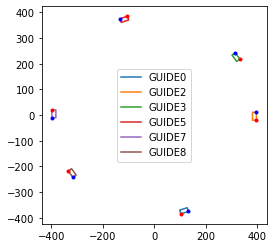

In [8]:
def plot_cs5(CS5=CS5):
    y, x = 2 * desietc.gfa.GFACamera.nampy - 1, 2 * desietc.gfa.GFACamera.nampx - 1
    corners = np.array([
        [1, 0, 0],
        [1, x, 0],
        [1, x, y],
        [1, 0, y]])
    corners = np.sum(CS5.reshape(6, 1, 3, 2) * corners.reshape(4, 3, 1), axis=2)
    ax = plt.gca()
    for i, name in enumerate(desietc.gfa.GFACamera.guide_names):
        (xy1, xy2, xy3, xy4) = corners[i]
        print(name, xy1, xy2)
        ax.plot(*np.transpose([xy1, xy2, xy3, xy4, xy1]), '-', label=name)
        ax.plot(*CS5[i][0], '.', color='r')
        ax.plot(xy2[0], xy2[1], '.', color='b')
    plt.legend()
    ax.set_aspect(1)

plot_cs5()

In [9]:
offsets = np.array([np.rad2deg(np.arctan2(G[1,1], G[1,0])) for G in CS5])
offsets

array([  18.13551027,   89.8353062 ,  126.20231422, -161.91694436,
        -90.03851363,  -54.27988513])

In [10]:
A = np.array(T[['A0','A2','A3','A5','A7','A8']]).view(np.float64).reshape(6, -1)
B = np.array(T[['B0','B2','B3','B5','B7','B8']]).view(np.float64).reshape(6, -1)
BETA = np.array(T[['BETA0','BETA2','BETA3','BETA5','BETA7','BETA8']]).view(np.float64).reshape(6, -1) + offsets.reshape(6, 1)

In [11]:
missing = (A==0)
A[missing] = np.nan
B[missing] = np.nan
BETA[missing] = np.nan

For computing the mean of angles: https://rosettacode.org/wiki/Averages/Mean_angle

In [12]:
A2 = np.nanmedian(A, axis=0)
B2 = np.nanmedian(B, axis=0)
X = np.nanmean(np.sin(np.deg2rad(BETA)), axis=0)
Y = np.nanmean(np.cos(np.deg2rad(BETA)), axis=0)
BETA2 = np.rad2deg(np.arctan2(X, Y))

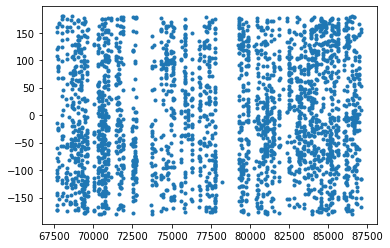

In [13]:
plt.plot(T['EXPID'], BETA2, '.');

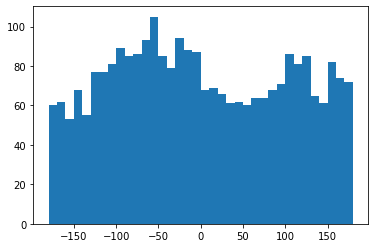

In [14]:
plt.hist(BETA2, bins=np.linspace(-180, 180, 37));

In [15]:
ELLIP = A2 / B2
SIZE = np.sqrt(A2 * B2)

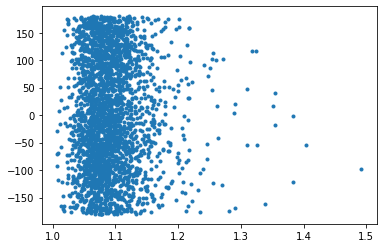

In [16]:
plt.plot(ELLIP, BETA2, '.');

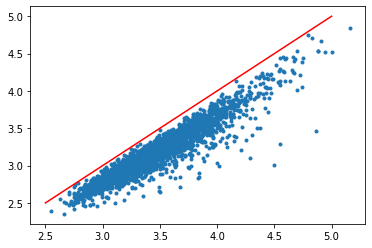

In [17]:
plt.plot(A2, B2, '.');
plt.plot([2.5,5],[2.5,5], 'r-')

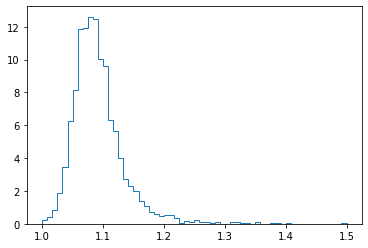

In [18]:
plt.hist(ELLIP, bins=np.linspace(1,1.5,61), density=True, histtype='step');

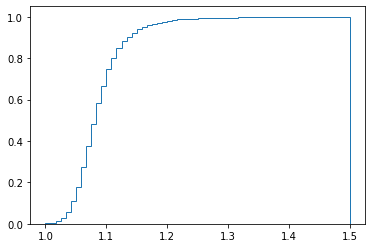

In [19]:
plt.hist(ELLIP, bins=np.linspace(1,1.5,61), cumulative=True, density=True, histtype='step');

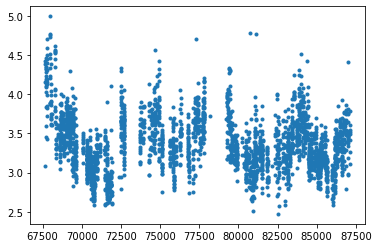

In [20]:
plt.plot(T['EXPID'], SIZE, '.')

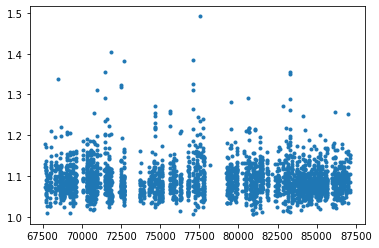

In [21]:
plt.plot(T['EXPID'], ELLIP, '.')

sigma in pixels -> sigma in arcsecs -> FWHM in arcsecs

In [22]:
conv = 0.2 * 2.355 / np.sqrt(2)

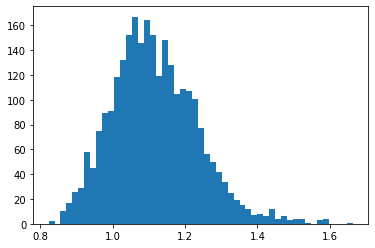

In [23]:
plt.hist(SIZE*conv, bins=51);

In [24]:
np.median(SIZE*conv)

1.1052784844251877

(0.1, 0.52)

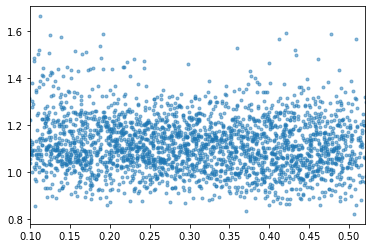

In [25]:
plt.plot(np.fmod(T['MJD'], 1), SIZE*conv, '.', alpha=0.5)
plt.xlim(0.1,0.52)

Fractional decrease over the night: -1.6%


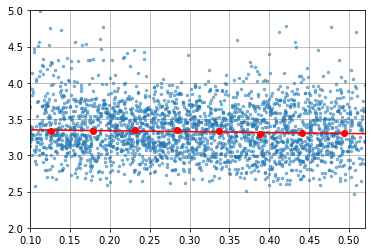

In [26]:
def trend(T=T, nbins=8):
    size = SIZE
    time = np.fmod(T['MJD'], 1)
    bins = np.linspace(0.1, 0.52, nbins+1)
    idx = np.digitize(time, bins) - 1
    plt.plot(time, size, '.', ms=5, alpha=0.5)
    plt.xlim(bins[0], bins[-1])
    plt.ylim(2, 5)
    meds = np.empty(nbins)
    for i in range(nbins):
        sel = idx == i
        meds[i] = np.median(size[sel])
    ctr = 0.5 * (bins[1:] + bins[:-1])
    plt.plot(ctr, meds, 'ro')
    plt.grid()
    slope, offset = np.polyfit(ctr, meds, deg=1)
    yline = offset + slope * bins
    plt.plot(bins, yline, 'r-')
    frac_change = (yline[-1] - yline[0]) / yline[0]
    print(f'Fractional decrease over the night: {1e2*frac_change:.1f}%')

trend()

Relationship between wind speed and shear magnitude
---------------------------------------------------

In [38]:
wind = T['EXPID'] == 84648
T[wind]

NIGHT,EXPID,MJD,A0,B0,BETA0,A2,B2,BETA2,A3,B3,BETA3,A5,B5,BETA5,A7,B7,BETA7,A8,B8,BETA8,wind_speed,wind_direction
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20210413,84648,59318.36255899,5.633269803988911,4.448264816964558,-21.05135803015651,5.780354600069857,4.21387989965788,-1.8277440461517154,5.965806047042259,4.14817577319879,31.248665975986153,5.649696340908427,4.476403032362625,-15.493069224150062,5.724512143043205,4.268088964950063,-4.068284582626563,6.065781815551616,4.180628518324541,31.598499992760107,14.7,323.0


In [27]:
weather = T['NIGHT'] < 20210123 
A3 = A2[weather]
B3 = B2[weather]
BETA3 = BETA2[weather]

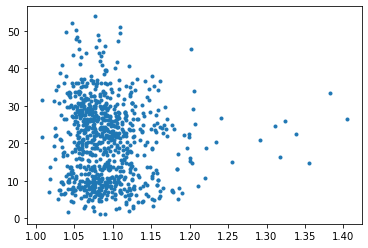

In [28]:
plt.plot(A3/B3, T[weather]["wind_speed"], '.')

Relationship between wind direction and shear orientation angle
---------------------------------------------------------------

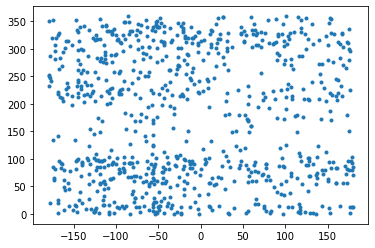

In [29]:
plt.plot(BETA3, T[weather]["wind_direction"], '.')